In [1]:
import numpy as np
import math
from qutip import create, basis, sigmaz, sigmax, sigmay
import matplotlib.pyplot as plt
import pandas as pd
from Please_Graduate import Quantum_System, Models

#experimental setting
omega_r = 2*np.pi*0.80
kai = -2*np.pi*0.18

#model fit setting
epochs = 100
batch_size = 128


In [2]:
# 1. qubit = 0, cavity =1, time 0 to 1 by n_times = 100
experiment_1 = Quantum_System(omega_r=omega_r, kai=kai, qubit_initial=0, cavity_initial=1, superposition=False)
df_1 = experiment_1.monte_carlo(n_sample=100,  n_times = 100, t_i=0, t_f=1)
df_1.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0.000000,0.0,0.0,1.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.010101,0.0,0.0,0.67,0.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.020202,0.0,0.0,0.26,0.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 4.3890 - binary_crossentropy: 4.3890 - val_loss: 4.3774 - val_binary_crossentropy: 4.3774
Epoch 2/100
1/1 [==============================] - 0s 35ms/step - loss: 4.1942 - binary_crossentropy: 4.1942 - val_loss: 4.2971 - val_binary_crossentropy: 4.2971
Epoch 3/100
1/1 [==============================] - 0s 41ms/step - loss: 4.0980 - binary_crossentropy: 4.0980 - val_loss: 4.2521 - val_binary_crossentropy: 4.2521
Epoch 4/100
1/1 [==============================] - 0s 43ms/step - loss: 4.0493 - binary_crossentropy: 4.0493 - val_loss: 4.2260 - val_binary_crossentropy: 4.2260
Epoch 5/100
1/1 [==============================] - 0s 41ms/step - loss: 4.0132 - binary_crossentropy: 4.0132 - val_loss: 4.2134 - val_binary_crossentropy: 4.2134
Epoch 6/100
1/1 [==============================] - 0s 38ms/step - loss: 3.9993 - binary_crossentropy: 3.9993 - val_loss: 4.2114 - val_binary_crossentropy: 4.2114
Epoch 7/100
1/1 [=============

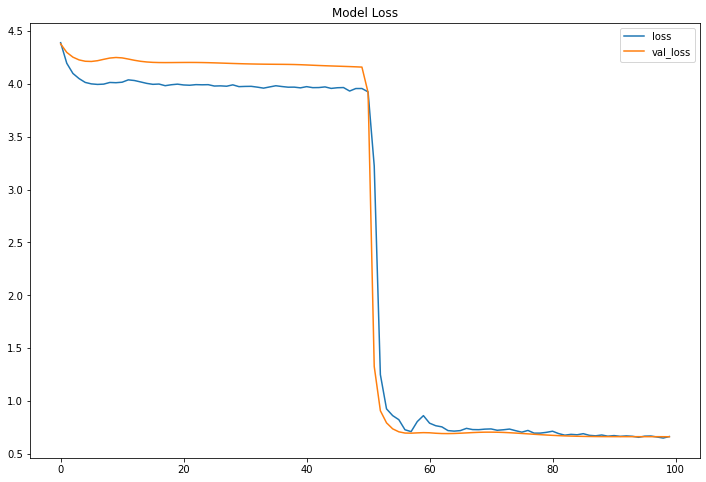

In [3]:
train_feature_1, train_label_1, test_feature_1, test_label_1 = experiment_1.preprocess(data = df_1, split_ratio=0.75, time_step=10)
model1 = Models(df_1, train_feature_1, train_label_1, test_feature_1, test_label_1)
lstm = model1.LSTM()
lstm, history = model1.fit(lstm,epochs=epochs, batch_size = batch_size, show_loss = True)

1/1 [==============================] - 0s 26ms/step - loss: 0.6433 - binary_crossentropy: 0.6433
test loss: 0.6433401107788086


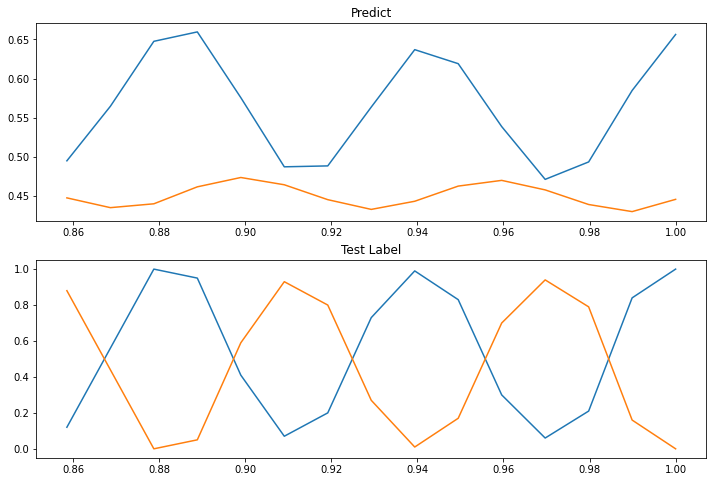

In [4]:
model1.predict(lstm,show_plot=True)

In [5]:
# 2. qubit = 0 and cavity =1 with Superposition state, time 0 to 1 by n_times = 1000
experiment_2 = Quantum_System(omega_r=omega_r, kai=kai, qubit_initial=0, cavity_initial=1, superposition=True)
df_2 = experiment_2.monte_carlo(n_sample=100,  n_times = 100, t_i=0, t_f=1)
df_2.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0.000000,0.0,0.0,0.48,0.00,0.52,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.010101,0.0,0.0,0.48,0.09,0.40,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.020202,0.0,0.0,0.17,0.37,0.34,0.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 2.4900 - binary_crossentropy: 2.4900 - val_loss: 2.3902 - val_binary_crossentropy: 2.3902
Epoch 2/100
1/1 [==============================] - 0s 31ms/step - loss: 2.4240 - binary_crossentropy: 2.4240 - val_loss: 2.3634 - val_binary_crossentropy: 2.3634
Epoch 3/100
1/1 [==============================] - 0s 31ms/step - loss: 2.4011 - binary_crossentropy: 2.4011 - val_loss: 2.3506 - val_binary_crossentropy: 2.3506
Epoch 4/100
1/1 [==============================] - 0s 32ms/step - loss: 2.3913 - binary_crossentropy: 2.3913 - val_loss: 2.3449 - val_binary_crossentropy: 2.3449
Epoch 5/100
1/1 [==============================] - 0s 31ms/step - loss: 2.3870 - binary_crossentropy: 2.3870 - val_loss: 2.3435 - val_binary_crossentropy: 2.3435
Epoch 6/100
1/1 [==============================] - 0s 26ms/step - loss: 2.3855 - binary_crossentropy: 2.3855 - val_loss: 2.3448 - val_binary_crossentropy: 2.3448
Epoch 7/100
1/1 [=============

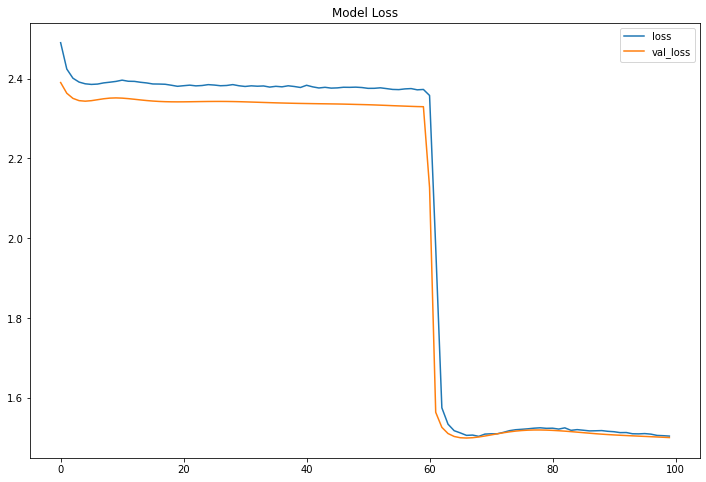

In [6]:
train_feature_2, train_label_2, test_feature_2, test_label_2 = experiment_2.preprocess(data = df_2, split_ratio=0.75, time_step=10)

model2 = Models(df_2, train_feature_2, train_label_2, test_feature_2, test_label_2)
lstm_2 = model2.LSTM()
lstm_2, history = model2.fit(lstm_2,epochs=epochs, batch_size = batch_size, show_loss = True)

1/1 [==============================] - 0s 16ms/step - loss: 1.6012 - binary_crossentropy: 1.6012
test loss: 1.6011852025985718


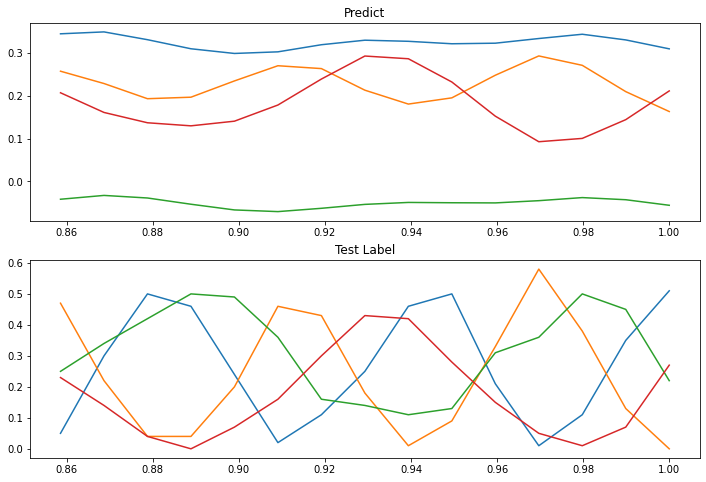

In [7]:
model2.predict(lstm_2, show_plot= True)

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 1.8826 - binary_crossentropy: 1.8826 - val_loss: 1.5514 - val_binary_crossentropy: 1.5514
Epoch 2/100
1/1 [==============================] - 0s 31ms/step - loss: 1.4652 - binary_crossentropy: 1.4652 - val_loss: 1.5141 - val_binary_crossentropy: 1.5141
Epoch 3/100
1/1 [==============================] - 0s 31ms/step - loss: 1.4246 - binary_crossentropy: 1.4246 - val_loss: 1.4933 - val_binary_crossentropy: 1.4933
Epoch 4/100
1/1 [==============================] - 0s 31ms/step - loss: 1.3990 - binary_crossentropy: 1.3990 - val_loss: 1.4809 - val_binary_crossentropy: 1.4809
Epoch 5/100
1/1 [==============================] - 0s 47ms/step - loss: 1.3836 - binary_crossentropy: 1.3836 - val_loss: 1.4739 - val_binary_crossentropy: 1.4739
Epoch 6/100
1/1 [==============================] - 0s 31ms/step - loss: 1.3731 - binary_crossentropy: 1.3731 - val_loss: 1.4706 - val_binary_crossentropy: 1.4706
Epoch 7/100
1/1 [=============

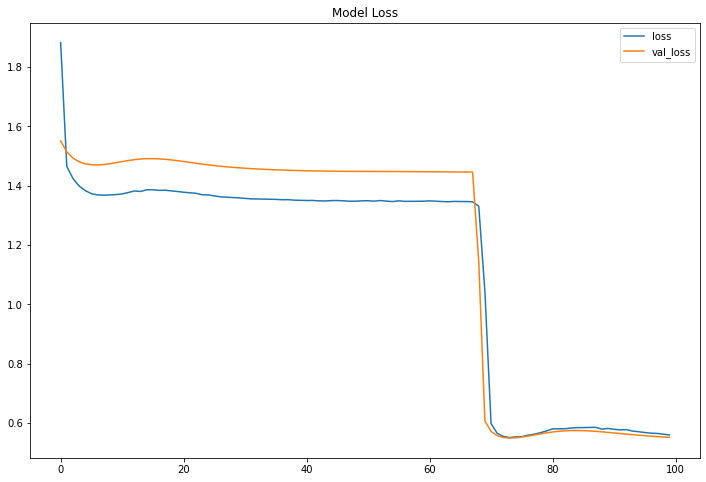

In [8]:
bilstm = model2.BiLSTM()
bilstm, history = model2.fit(bilstm,epochs=epochs, batch_size = batch_size, show_loss = True)

1/1 [==============================] - 0s 16ms/step - loss: 0.5543 - binary_crossentropy: 0.5543
test loss: 0.5542904138565063


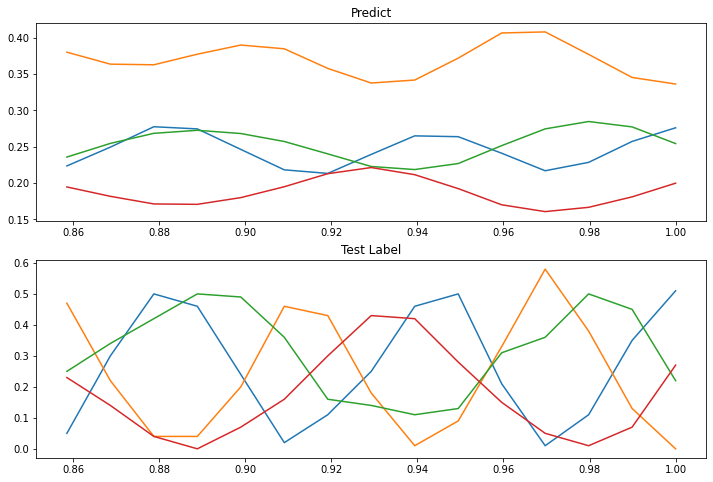

In [9]:
model2.predict(bilstm,show_plot=True)

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 0.8853 - mean_squared_error: 0.8853 - val_loss: 24.1875 - val_mean_squared_error: 24.1875
Epoch 2/100
1/1 [==============================] - 0s 94ms/step - loss: 20.2309 - mean_squared_error: 20.2309 - val_loss: 6.1725 - val_mean_squared_error: 6.1725
Epoch 3/100
1/1 [==============================] - 0s 63ms/step - loss: 5.6189 - mean_squared_error: 5.6189 - val_loss: 7.0233 - val_mean_squared_error: 7.0233
Epoch 4/100
1/1 [==============================] - 0s 64ms/step - loss: 6.5916 - mean_squared_error: 6.5916 - val_loss: 1.2963 - val_mean_squared_error: 1.2963
Epoch 5/100
1/1 [==============================] - 0s 63ms/step - loss: 1.2269 - mean_squared_error: 1.2269 - val_loss: 2.6615 - val_mean_squared_error: 2.6615
Epoch 6/100
1/1 [==============================] - 0s 62ms/step - loss: 2.5423 - mean_squared_error: 2.5423 - val_loss: 4.6361 - val_mean_squared_error: 4.6361
Epoch 7/100
1/1 [=====================

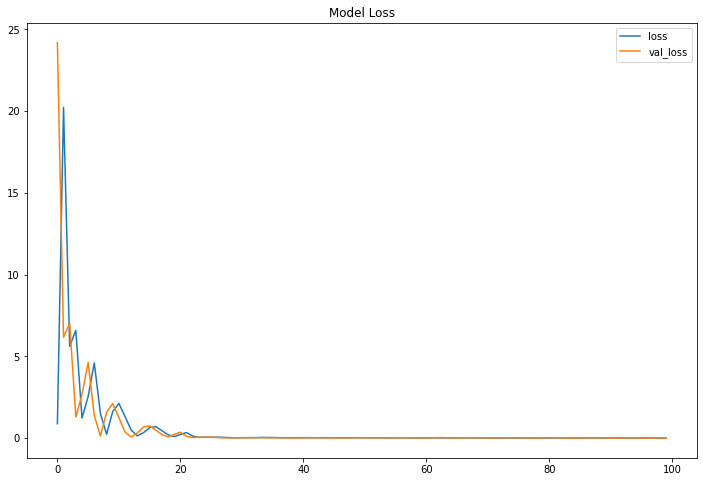

In [10]:
#transformer setting
key_dim = 256
num_heads = 4
ff_dim = 128
num_blocks = 1

transformer = model2.Transfomer(key_dim=key_dim, num_heads=num_heads, ff_dim = ff_dim, num_blocks=num_blocks)
transformer, history = model2.fit(transformer,epochs=epochs, batch_size = batch_size, show_loss = True)

1/1 [==============================] - 0s 16ms/step - loss: 0.0127 - mean_squared_error: 0.0127
test loss: 0.012735435739159584


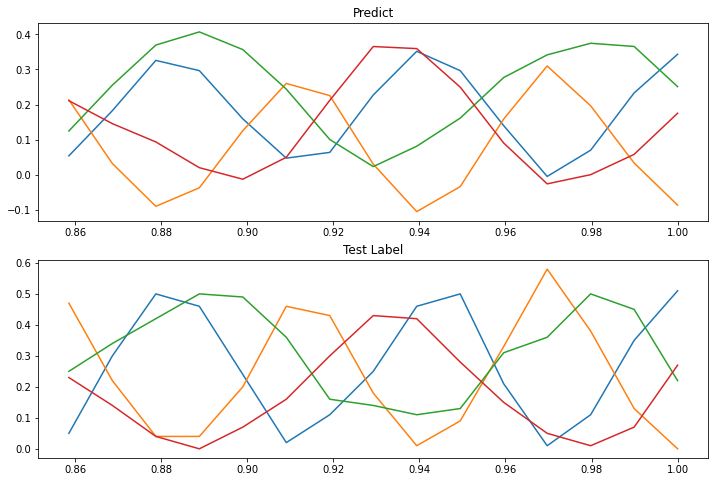

In [11]:
model2.predict(transformer)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1.3904 - mean_squared_error: 1.3904 - val_loss: 5.0989 - val_mean_squared_error: 5.0989
Epoch 2/100
1/1 [==============================] - 0s 58ms/step - loss: 4.1743 - mean_squared_error: 4.1743 - val_loss: 0.5391 - val_mean_squared_error: 0.5391
Epoch 3/100
1/1 [==============================] - 0s 62ms/step - loss: 0.4143 - mean_squared_error: 0.4143 - val_loss: 1.5350 - val_mean_squared_error: 1.5350
Epoch 4/100
1/1 [==============================] - 0s 63ms/step - loss: 1.1752 - mean_squared_error: 1.1752 - val_loss: 0.7098 - val_mean_squared_error: 0.7098
Epoch 5/100
1/1 [==============================] - 0s 62ms/step - loss: 0.6214 - mean_squared_error: 0.6214 - val_loss: 0.1675 - val_mean_squared_error: 0.1675
Epoch 6/100
1/1 [==============================] - 0s 52ms/step - loss: 0.2756 - mean_squared_error: 0.2756 - val_loss: 0.5537 - val_mean_squared_error: 0.5537
Epoch 7/100
1/1 [=========================

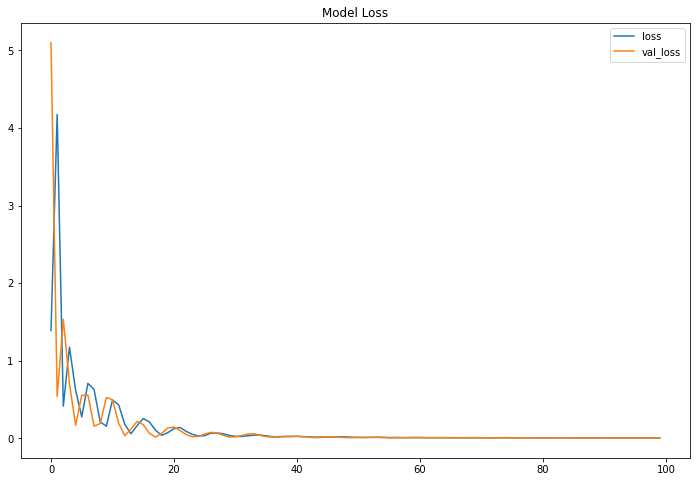

In [12]:
transformer_conv = model2.Transfomer_conv(key_dim=key_dim, num_heads=num_heads, ff_dim = ff_dim, num_blocks=num_blocks)
transformer_conv, history = model2.fit(transformer_conv,epochs=epochs, batch_size = batch_size, show_loss = True)

1/1 [==============================] - 0s 6ms/step - loss: 0.0053 - mean_squared_error: 0.0053
test loss: 0.005319714080542326


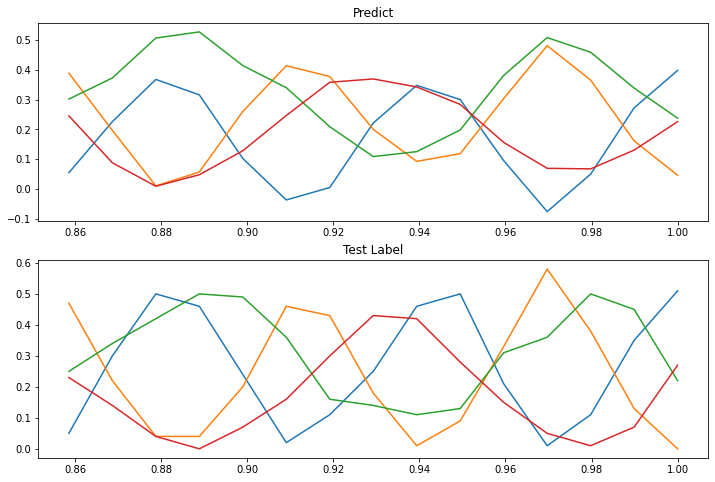

In [13]:
model2.predict(transformer_conv)